In [2]:
install.packages("ggplot2")

Installing package into 'C:/Users/cemh0/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cemh0\AppData\Local\Temp\RtmpQLRogu\downloaded_packages


In [3]:
library(ggplot2)
theme_set(theme_minimal())
head(economics)
help("economics")

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


economics               package:ggplot2                R Documentation

_U_S _e_c_o_n_o_m_i_c _t_i_m_e _s_e_r_i_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     This dataset was produced from US economic time series data
     available from <https://fred.stlouisfed.org/>. 'economics' is in
     "wide" format, 'economics_long' is in "long" format.

_U_s_a_g_e:

     economics
     
     economics_long
     
_F_o_r_m_a_t:

     A data frame with 574 rows and 6 variables:

     date Month of data collection

     pce personal consumption expenditures, in billions of dollars,
          <https://fred.stlouisfed.org/series/PCE>

     pop total population, in thousands,
          <https://fred.stlouisfed.org/series/POP>

     psavert personal savings rate,
          <https://fred.stlouisfed.org/series/PSAVERT/>

     uempmed median duration of unemployment, in weeks,
          <https://fred.stlouisfed.org/series/UEMPMED>

     unemploy number of unemployed in thous

Podemos graficar la serie con una geom_line de ggplot

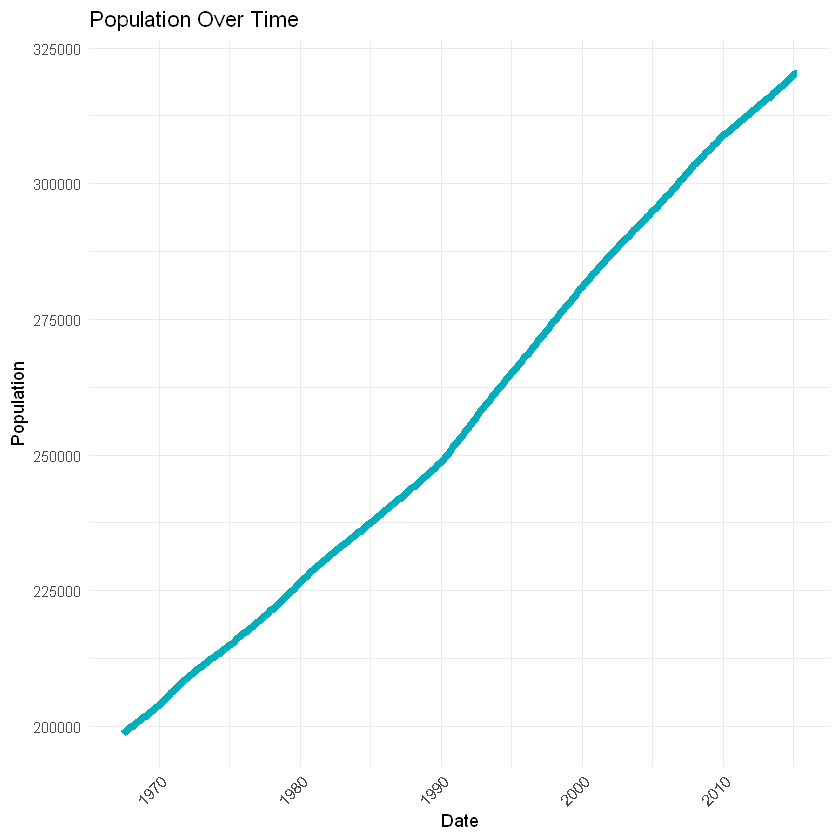

In [4]:
ggplot(data = economics, aes(x = date, y = pop)) +
  geom_line(color = "#00AFBB", linewidth = 2) +
  labs(title = "Population Over Time",
       x = "Date",
       y = "Population") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

También es posible graficar sólo un subconjunto

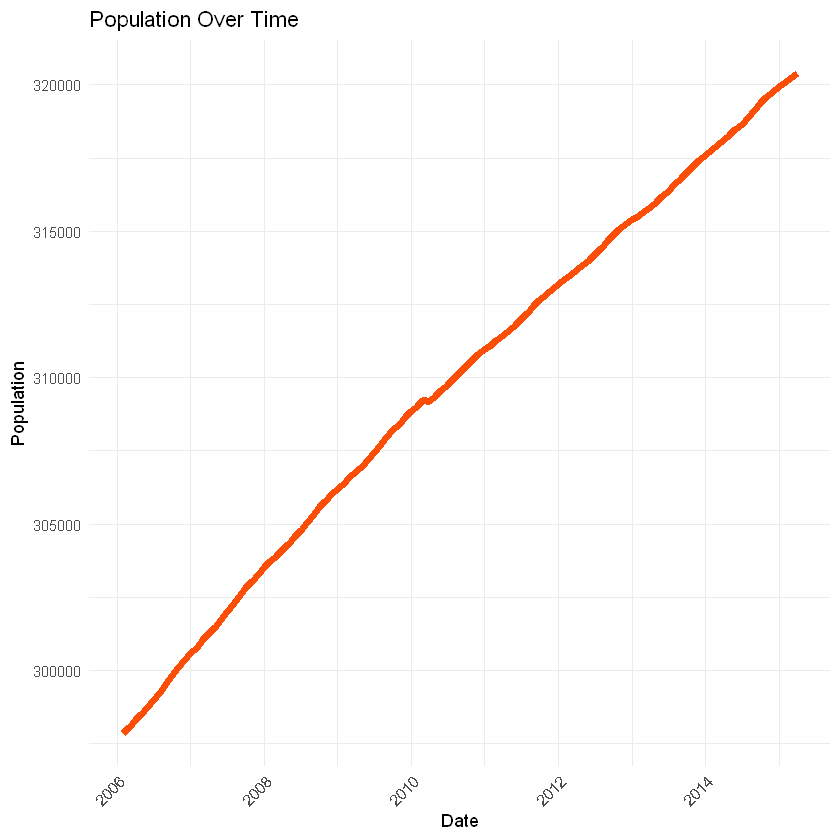

In [5]:
ss <- subset(economics, date > as.Date("2006-01-01"))
ggplot(data = ss, aes(x = date, y = pop)) +
  geom_line(color = "#FC4E07", linewidth = 2) +
  labs(title = "Population Over Time",
       x = "Date",
       y = "Population") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Se puede modificar el tamaño de la línea de acuerdo a la proporción entre personas desempleadas y la población

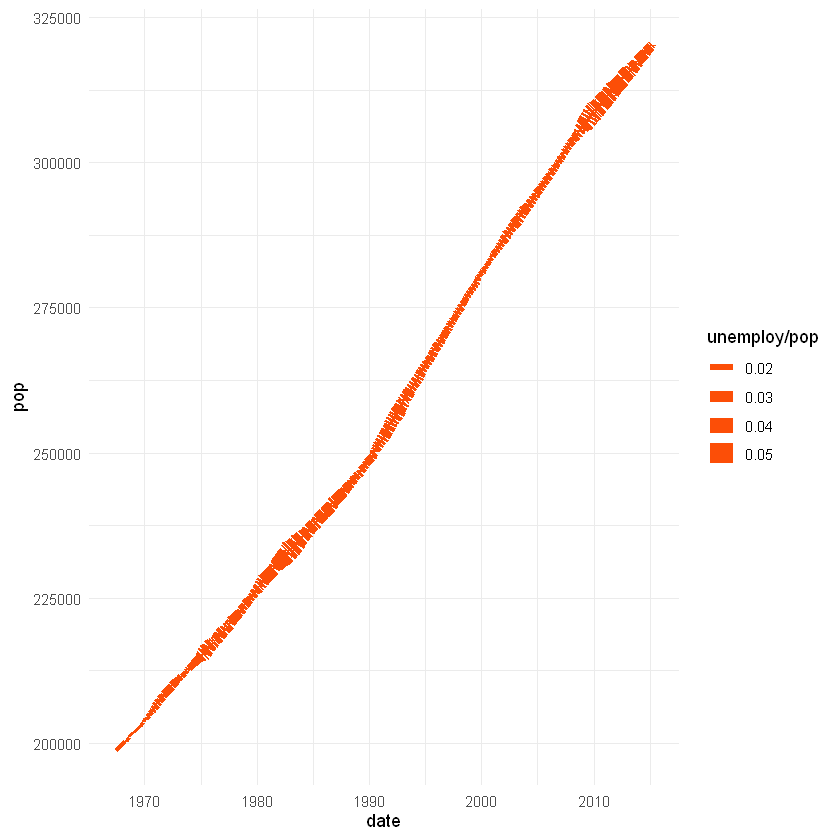

In [7]:
ggplot(data = economics, aes(x = date, y = pop)) +
  geom_line(aes(linewidth = unemploy / pop), color = "#FC4E07")

La autocorrelación de pop, psavert y uempmed

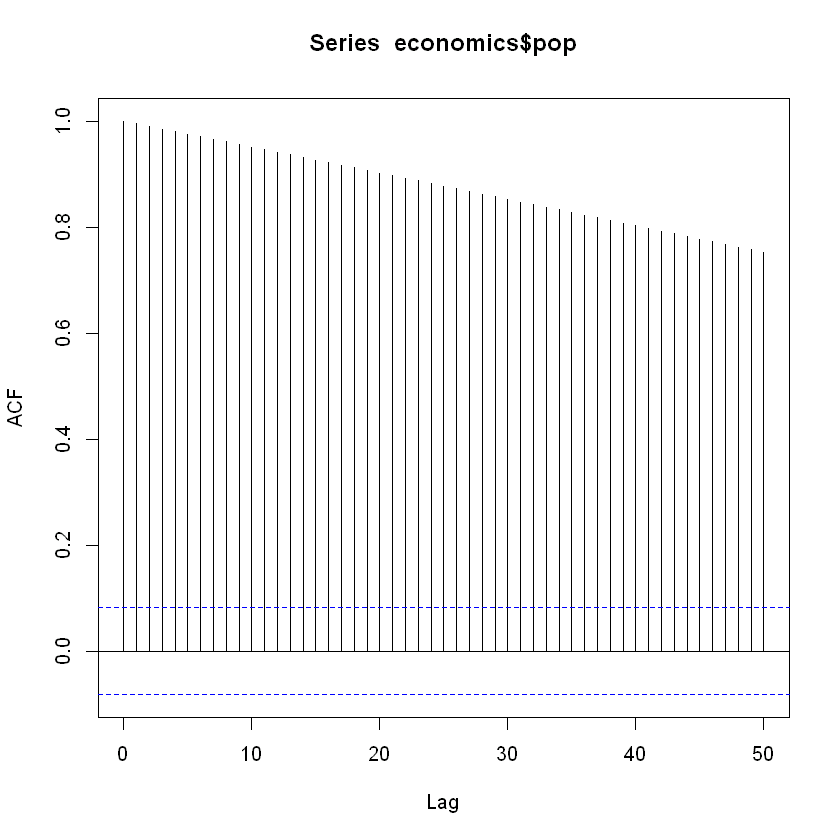

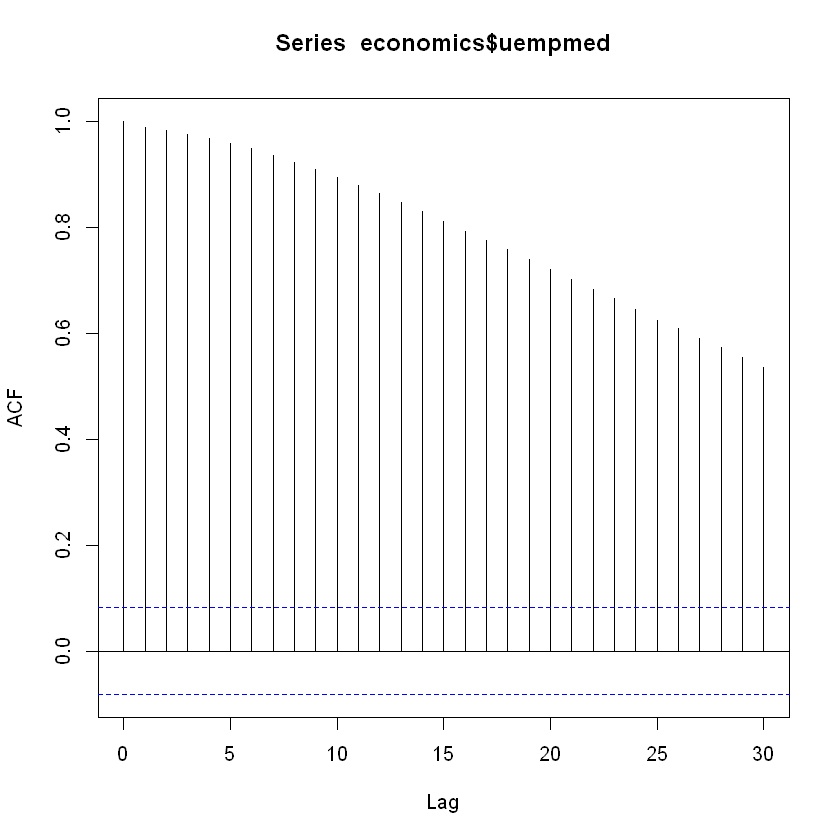

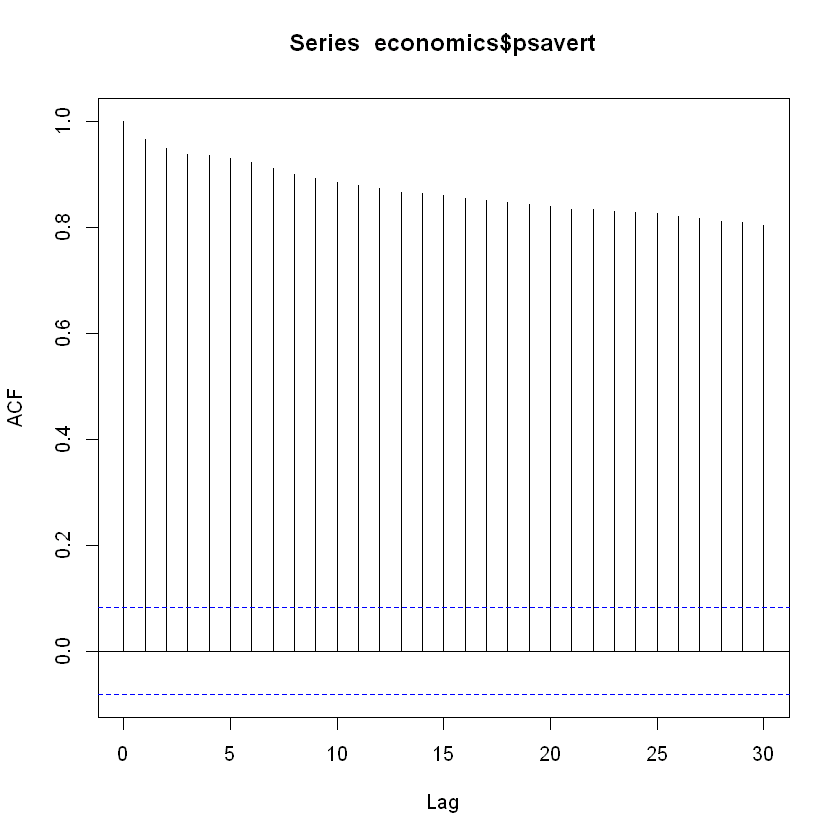

In [8]:
acf(economics$pop, 50)
acf(economics$uempmed, 30)
acf(economics$psavert, 30)

Graficar mútiple series de datos, psavert y uempmed por fecha; primero usaremos dos bibliotecas auxiliares

In [15]:
library(tidyr)
library(dplyr)

Con select de tidyr elegimos las columnas a usar y con gather de dplyr se crea una variable de agrupamiento para las columnas elegidas

In [17]:
df <- economics %>%
  select(date, psavert, uempmed) %>%
  gather(key = "variable", value = "value", -date)
head(df, 3)

date,variable,value
<date>,<chr>,<dbl>
1967-07-01,psavert,12.6
1967-08-01,psavert,12.6
1967-09-01,psavert,11.9


Gráfica con múltilpes líneas

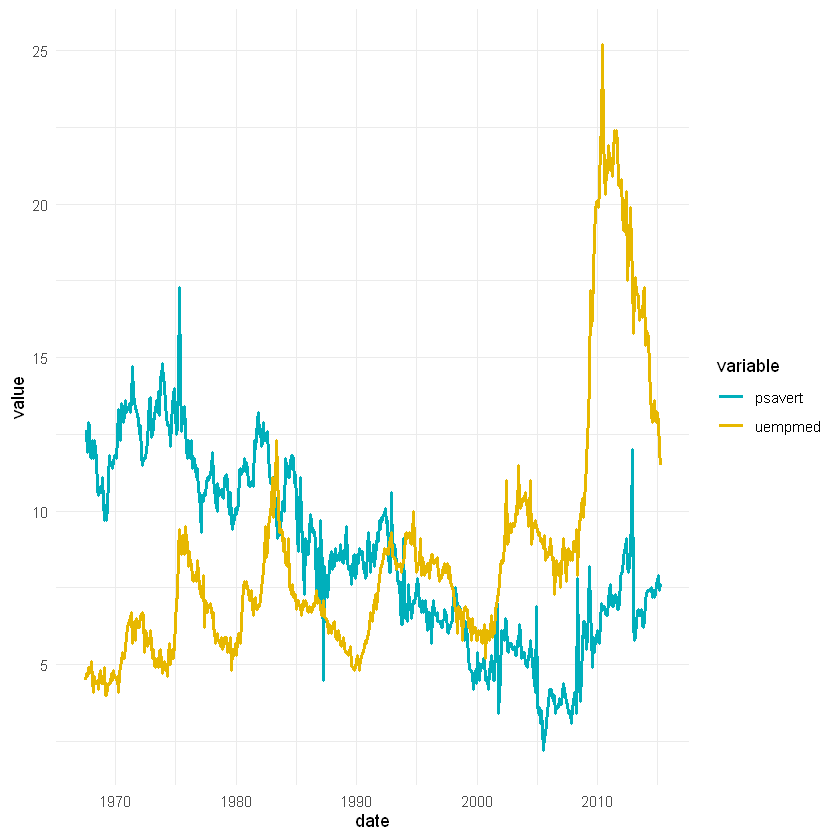

In [18]:
ggplot(df, aes(x = date, y = value)) +
  geom_line(aes(color = variable), size = 1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()

Gráfica con áreas

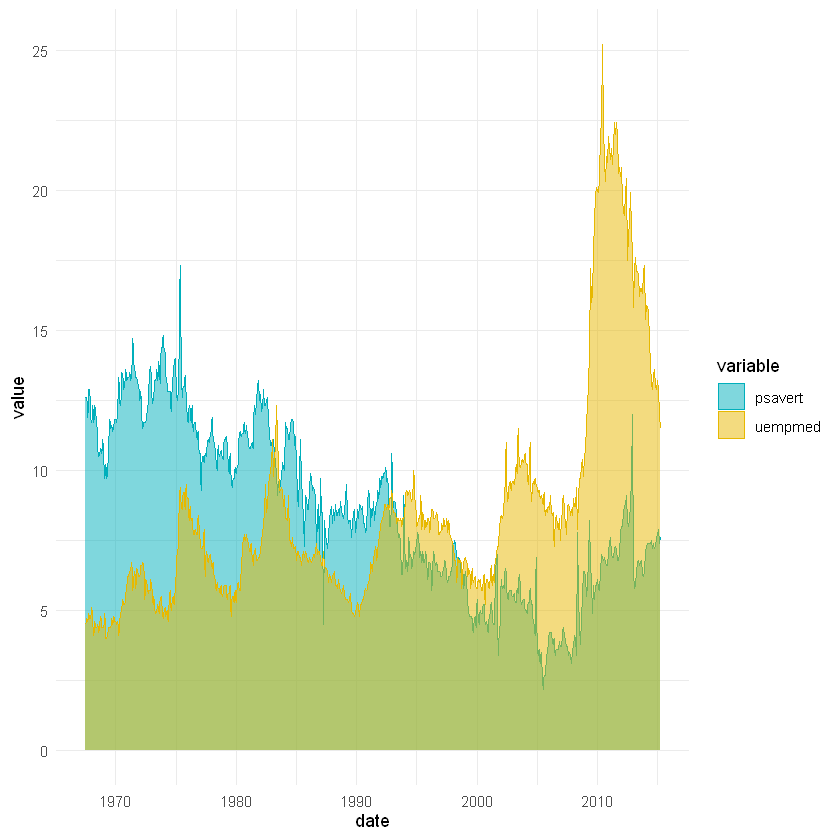

In [19]:
ggplot(df, aes(x = date, y = value)) +
  geom_area(aes(color = variable, fill = variable),
            alpha = 0.5, position = position_dodge(0.8)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  scale_fill_manual(values = c("#00AFBB", "#E7B800"))

Se pueden establecer límites a los ejes; gráfica base

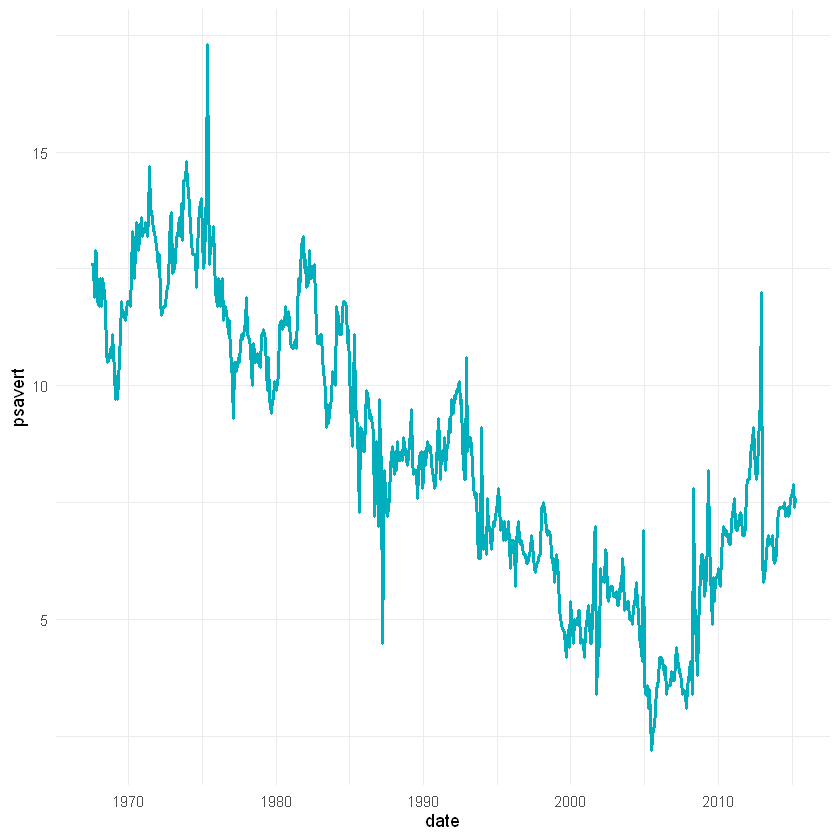

In [22]:
p <- ggplot(data = economics, aes(x = date, y = psavert)) +
  geom_line(color = "#00AFBB", size = 1)
p

Establecer los límites

Warning message:
"Removed 414 rows containing missing values or values outside the scale range
(`geom_line()`)."


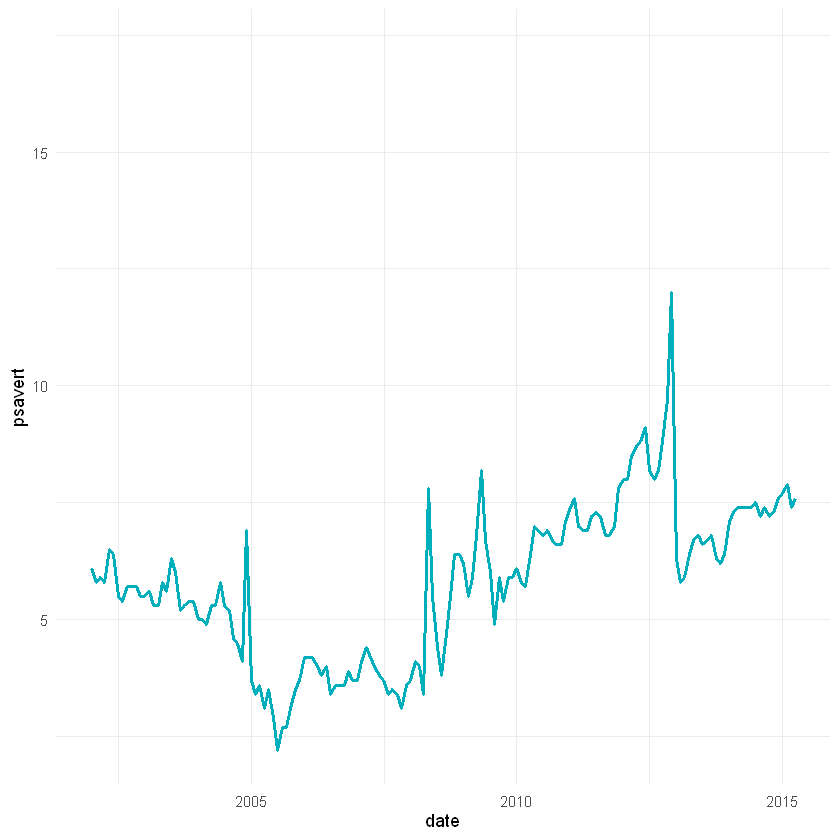

In [24]:
min <- as.Date("2002-1-1")
max <- NA
p + scale_x_date(limits = c(min, max))

Formato al eje de fechas:

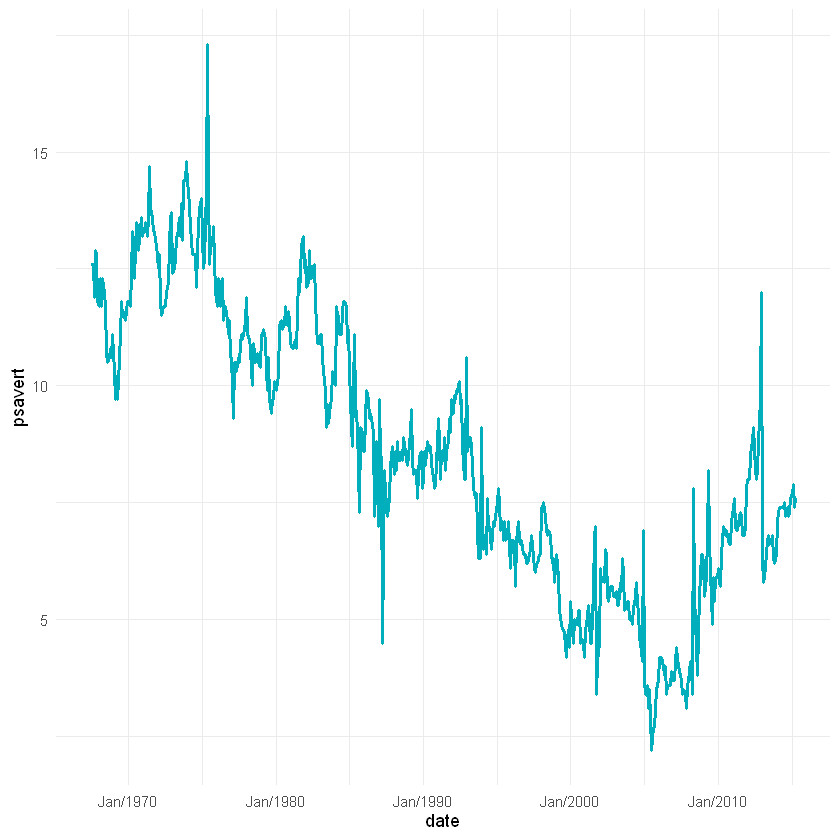

In [25]:
p + scale_x_date(date_labels = "%b/%Y")

Se puede agregar una línea suavizada de tendencia; el método loess es una regresión local es un enfoque no paramétrico que ajusta la regresión en un vecindario local:

`geom_smooth()` using formula = 'y ~ x'


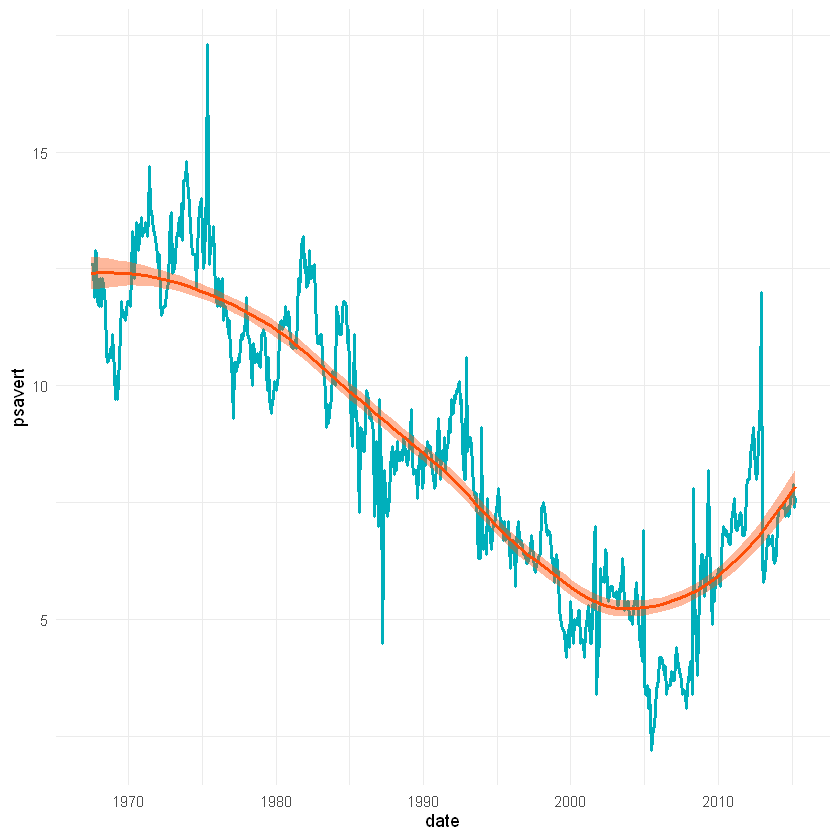

In [27]:
p + stat_smooth(
  color = "#FC4E07", fill = "#FC4E07", method = "loess"
)

Y se puede usar también la media móvil:

Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_line()`)."


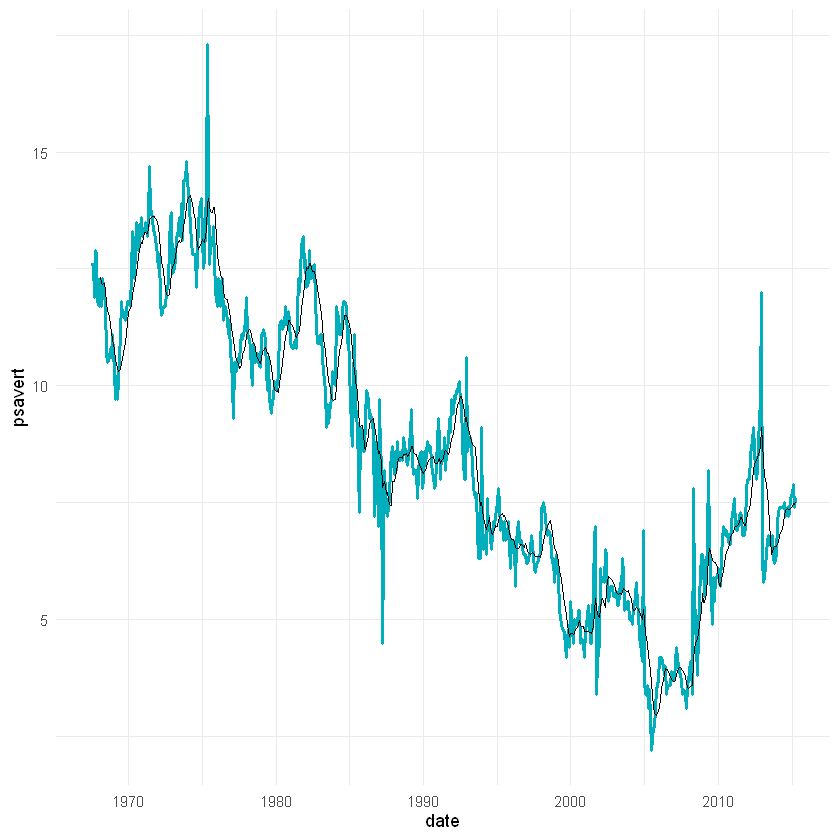

In [28]:
library("TTR")
psr <- SMA(economics$psavert, n = 8)
p + geom_line(aes(x = date, y = psr))